In [13]:
#import dependencies
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import requests
import hvplot.pandas

from pprint import pprint

In [14]:
#Import CSV
all_df = pd.read_csv("output/offences_dates.csv", index_col=0)
all_df.dropna(how='any', inplace=True)
all_df.head()


,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,Month,Year
0,2013-07-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,2,7,2013
1,2013-07-01,ALDINGA BEACH,5173,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,1,7,2013
2,2013-07-01,ALDINGA BEACH,5173,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,1,7,2013
3,2013-07-01,BEDFORD PARK,5042,OFFENCES AGAINST THE PERSON,ROBBERY AND RELATED OFFENCES,Blackmail and extortion,1,7,2013
4,2013-07-01,BURTON,5110,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,Threatening behaviour,1,7,2013


In [15]:
#set year as index
by_year = all_df.set_index("Year")
by_year



,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,Month
Year,,,,,,,,
2013,2013-07-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,2,7
2013,2013-07-01,ALDINGA BEACH,5173,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,1,7
2013,2013-07-01,ALDINGA BEACH,5173,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,1,7
2013,2013-07-01,BEDFORD PARK,5042,OFFENCES AGAINST THE PERSON,ROBBERY AND RELATED OFFENCES,Blackmail and extortion,1,7
2013,2013-07-01,BURTON,5110,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,Threatening behaviour,1,7
...,...,...,...,...,...,...,...,...
2022,2022-12-31,SEMAPHORE PARK,5019,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault resulting in injury,1,12
2022,2022-12-31,SURREY DOWNS,5126,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,1,12
2022,2022-12-31,TEA TREE GULLY,5091,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Assault police,1,12


In [16]:
by_offence = all_df.set_index("Offence Level 1 Description")
by_offence


,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 2 Description,Offence Level 3 Description,Offence count,Month,Year
Offence Level 1 Description,,,,,,,,
OFFENCES AGAINST THE PERSON,2013-07-01,ADELAIDE,5000,ACTS INTENDED TO CAUSE INJURY,Common Assault,2,7,2013
OFFENCES AGAINST THE PERSON,2013-07-01,ALDINGA BEACH,5173,ACTS INTENDED TO CAUSE INJURY,Common Assault,1,7,2013
OFFENCES AGAINST THE PERSON,2013-07-01,ALDINGA BEACH,5173,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,1,7,2013
OFFENCES AGAINST THE PERSON,2013-07-01,BEDFORD PARK,5042,ROBBERY AND RELATED OFFENCES,Blackmail and extortion,1,7,2013
OFFENCES AGAINST THE PERSON,2013-07-01,BURTON,5110,OTHER OFFENCES AGAINST THE PERSON,Threatening behaviour,1,7,2013
...,...,...,...,...,...,...,...,...
OFFENCES AGAINST THE PERSON,2022-12-31,SEMAPHORE PARK,5019,ACTS INTENDED TO CAUSE INJURY,Serious Assault resulting in injury,1,12,2022
OFFENCES AGAINST THE PERSON,2022-12-31,SURREY DOWNS,5126,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,1,12,2022
OFFENCES AGAINST THE PERSON,2022-12-31,TEA TREE GULLY,5091,ACTS INTENDED TO CAUSE INJURY,Assault police,1,12,2022


In [17]:
year_count_simple = all_df['Offence count'].groupby(all_df['Year']).sum()
year_count_simple

Year
2013    10777
2014    22831
2015    24320
2016    23124
2017    22235
2018    22150
2019    20910
2020    21943
2021    23025
2022    24828
Name: Offence count, dtype: int64

In [18]:
year_count_df = all_df.groupby(['Offence Level 1 Description', 'Year']).agg({'Offence count':'sum'}).reset_index()
year_count_df

,Offence Level 1 Description,Year,Offence count
0,OFFENCES AGAINST THE PERSON,2013,10777
1,OFFENCES AGAINST THE PERSON,2014,22831
2,OFFENCES AGAINST THE PERSON,2015,24320
3,OFFENCES AGAINST THE PERSON,2016,23124
4,OFFENCES AGAINST THE PERSON,2017,22235
5,OFFENCES AGAINST THE PERSON,2018,22150
6,OFFENCES AGAINST THE PERSON,2019,20910
7,OFFENCES AGAINST THE PERSON,2020,21943
8,OFFENCES AGAINST THE PERSON,2021,23025
9,OFFENCES AGAINST THE PERSON,2022,24828


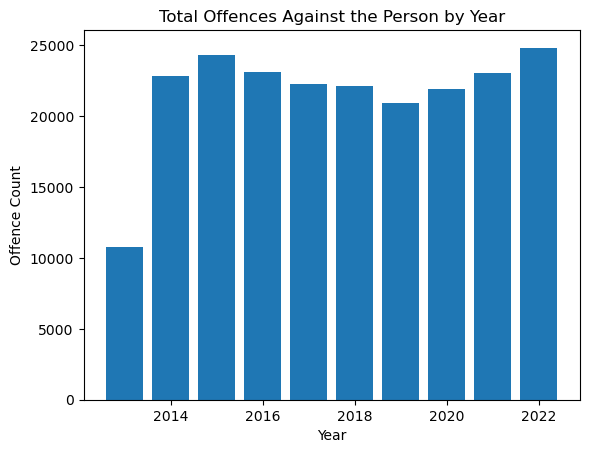

In [19]:
plt.bar(year_count_df['Year'], year_count_df['Offence count'])
#Details
plt.xlabel('Year')
plt.ylabel('Offence Count')
plt.title(f'Total Offences Against the Person by Year')
#Show the plot

plt.show()

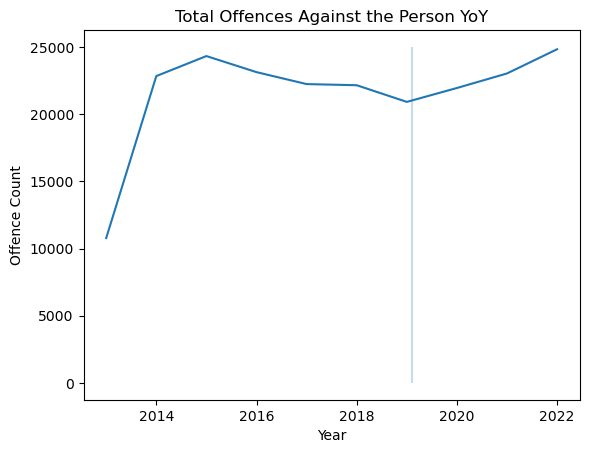

In [20]:
plt.plot(year_count_df['Year'], year_count_df['Offence count'])
#Details
plt.xlabel('Year')
plt.ylabel('Offence Count')
plt.title(f'Total Offences Against the Person YoY')
plt.vlines(2019.1, 0, 25000, alpha=0.25)
#Show the plot

plt.show()

In [21]:
level2_count_df = all_df.groupby(['Offence Level 2 Description','Year']).agg({'Offence count':'sum'}).reset_index()
level2_count_df.head()


,Offence Level 2 Description,Year,Offence count
0,ACTS INTENDED TO CAUSE INJURY,2013,7843
1,ACTS INTENDED TO CAUSE INJURY,2014,16737
2,ACTS INTENDED TO CAUSE INJURY,2015,17993
3,ACTS INTENDED TO CAUSE INJURY,2016,17519
4,ACTS INTENDED TO CAUSE INJURY,2017,16665


In [22]:
#Offences by level 2 each year
level2_2013_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Year']==2013,:])
level2_2014_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Year']==2014,:])
level2_2015_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Year']==2015,:])
level2_2016_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Year']==2016,:])
level2_2017_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Year']==2017,:])
level2_2018_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Year']==2018,:])
level2_2019_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Year']==2019,:])
level2_2020_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Year']==2020,:])
level2_2021_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Year']==2021,:])
level2_2022_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Year']==2022,:])
level2_2013_df.head()


,Offence Level 2 Description,Year,Offence count
0,ACTS INTENDED TO CAUSE INJURY,2013,7843
10,HOMICIDE AND RELATED OFFENCES,2013,29
20,OTHER OFFENCES AGAINST THE PERSON,2013,1573
30,ROBBERY AND RELATED OFFENCES,2013,386
40,SEXUAL ASSAULT AND RELATED OFFENCES,2013,946


In [23]:
#level 2 offences by year
acts_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Offence Level 2 Description']==f'ACTS INTENDED TO CAUSE INJURY',:])
homicide_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Offence Level 2 Description']==f'HOMICIDE AND RELATED OFFENCES',:])
other_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Offence Level 2 Description']==f'OTHER OFFENCES AGAINST THE PERSON',:])
robbery_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Offence Level 2 Description']==f'ROBBERY AND RELATED OFFENCES',:])
sexual_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Offence Level 2 Description']==f'SEXUAL ASSAULT AND RELATED OFFENCES',:])
sexual_df

,Offence Level 2 Description,Year,Offence count
40,SEXUAL ASSAULT AND RELATED OFFENCES,2013,946
41,SEXUAL ASSAULT AND RELATED OFFENCES,2014,1979
42,SEXUAL ASSAULT AND RELATED OFFENCES,2015,2022
43,SEXUAL ASSAULT AND RELATED OFFENCES,2016,1903
44,SEXUAL ASSAULT AND RELATED OFFENCES,2017,2050
45,SEXUAL ASSAULT AND RELATED OFFENCES,2018,1991
46,SEXUAL ASSAULT AND RELATED OFFENCES,2019,1942
47,SEXUAL ASSAULT AND RELATED OFFENCES,2020,2022
48,SEXUAL ASSAULT AND RELATED OFFENCES,2021,2168
49,SEXUAL ASSAULT AND RELATED OFFENCES,2022,2253


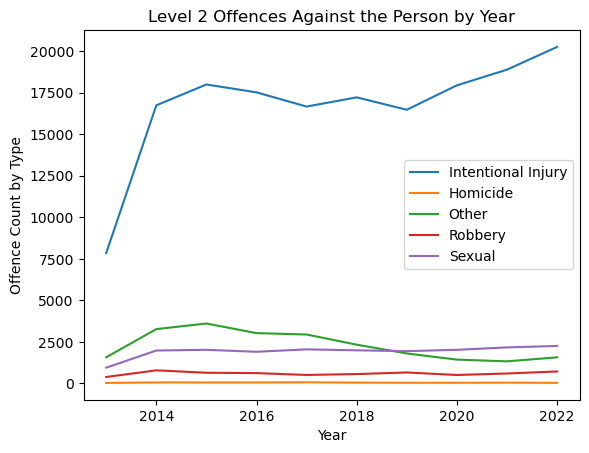

In [24]:
#Useless level 2 All yoy
intentional, = plt.plot(acts_df['Year'], acts_df['Offence count'], label = "Intentional Injury")
homicide, = plt.plot(homicide_df['Year'], homicide_df['Offence count'], label = "Homicide")
other, = plt.plot(other_df['Year'], other_df['Offence count'], label = "Other")
robbery, = plt.plot(robbery_df['Year'], robbery_df['Offence count'], label = "Robbery")
sexual, = plt.plot(sexual_df['Year'], sexual_df['Offence count'], label = "Sexual")

#Details
plt.xlabel('Year')
plt.ylabel('Offence Count by Type')
plt.title(f'Level 2 Offences Against the Person by Year')
# Create a legend for our chart
plt.legend(handles=[intentional, homicide, other, robbery, sexual ], loc="best")
plt.show()

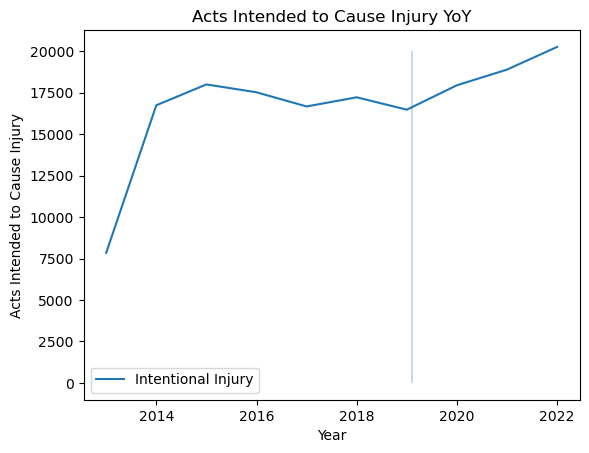

In [25]:
intentional, = plt.plot(acts_df['Year'], acts_df['Offence count'], label = "Intentional Injury")
#details
plt.xlabel('Year')
plt.ylabel('Acts Intended to Cause Injury')
plt.title(f'Acts Intended to Cause Injury YoY')
plt.vlines(2019.1, 0, 20000, alpha=0.25)
# Create a legend for our chart
plt.legend(handles=[intentional], loc="lower left")
plt.show()

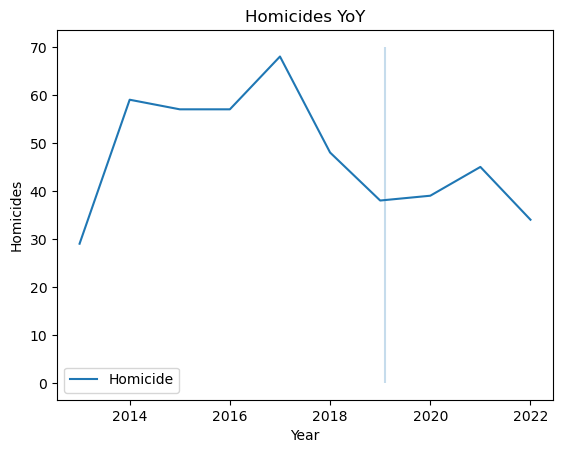

In [26]:
homicide, = plt.plot(homicide_df['Year'], homicide_df['Offence count'], label = "Homicide")
#Details
plt.xlabel('Year')
plt.ylabel('Homicides')
plt.title(f'Homicides YoY')
plt.vlines(2019.1, 0, 70, alpha=0.25)
# Create a legend for our chart
plt.legend(handles=[homicide], loc="lower left")
plt.show()

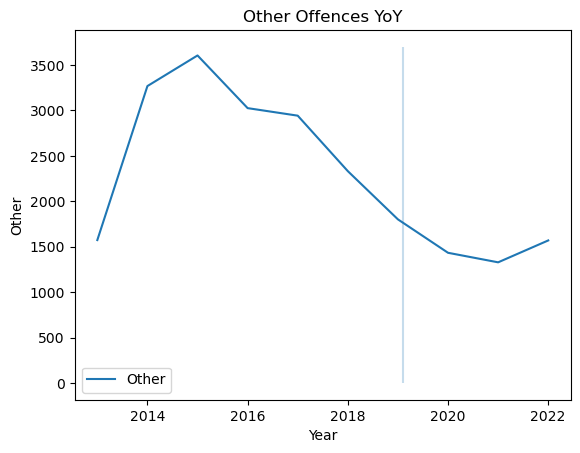

In [27]:
other, = plt.plot(other_df['Year'], other_df['Offence count'], label = "Other")
#Details
plt.xlabel('Year')
plt.ylabel('Other')
plt.title(f'Other Offences YoY')
plt.vlines(2019.1, 0, 3700, alpha=0.25)
# Create a legend for our chart
plt.legend(handles=[other], loc="lower left")
plt.show()

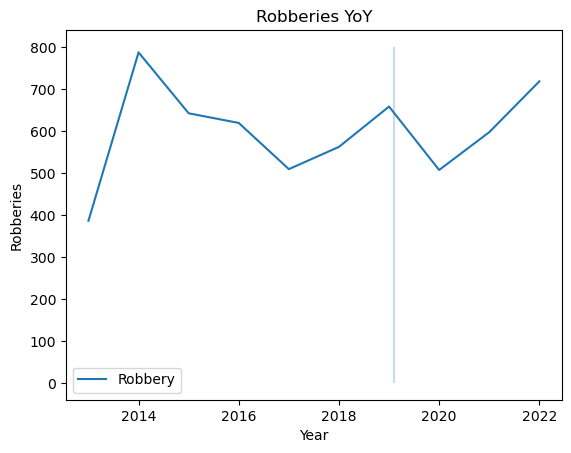

In [28]:
robbery, = plt.plot(robbery_df['Year'], robbery_df['Offence count'], label = "Robbery")
#Details
plt.xlabel('Year')
plt.ylabel('Robberies')
plt.title(f'Robberies YoY')
plt.vlines(2019.1, 0, 800, alpha=0.25)
# Create a legend for our chart
plt.legend(handles=[robbery], loc="lower left")
plt.show()

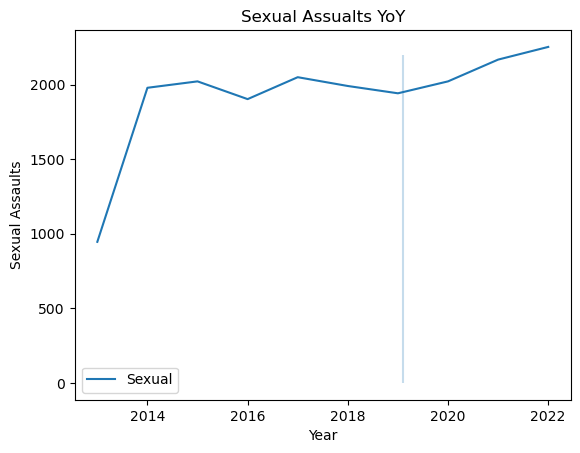

In [29]:
sexual, = plt.plot(sexual_df['Year'], sexual_df['Offence count'], label = "Sexual")
#Details
plt.xlabel('Year')
plt.ylabel('Sexual Assaults')
plt.title(f'Sexual Assualts YoY')
plt.vlines(2019.1, 0, 2200, alpha=0.25)
# Create a legend for our chart
plt.legend(handles=[sexual], loc="lower left")
plt.show()

In [46]:
#Offences by level 2 each year
level2_2013_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Year']==2013,:])
level2_2013_df.set_index('Offence Level 2 Description', inplace=True)

level2_2014_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Year']==2014,:])
level2_2014_df.set_index('Offence Level 2 Description', inplace=True)

level2_2015_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Year']==2015,:])
level2_2015_df.set_index('Offence Level 2 Description', inplace=True)

level2_2016_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Year']==2016,:])
level2_2016_df.set_index('Offence Level 2 Description', inplace=True)

level2_2017_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Year']==2017,:])
level2_2017_df.set_index('Offence Level 2 Description', inplace=True)

level2_2018_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Year']==2018,:])
level2_2018_df.set_index('Offence Level 2 Description', inplace=True)

level2_2019_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Year']==2019,:])
level2_2019_df.set_index('Offence Level 2 Description', inplace=True)

level2_2020_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Year']==2020,:])
level2_2020_df.set_index('Offence Level 2 Description', inplace=True)

level2_2021_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Year']==2021,:])
level2_2021_df.set_index('Offence Level 2 Description', inplace=True)

level2_2022_df = pd.DataFrame(level2_count_df.loc[level2_count_df['Year']==2022,:])
level2_2022_df.set_index('Offence Level 2 Description', inplace=True)
level2_2013_df


,Year,Offence count
Offence Level 2 Description,,
ACTS INTENDED TO CAUSE INJURY,2013,7843
HOMICIDE AND RELATED OFFENCES,2013,29
OTHER OFFENCES AGAINST THE PERSON,2013,1573
ROBBERY AND RELATED OFFENCES,2013,386
SEXUAL ASSAULT AND RELATED OFFENCES,2013,946


Text(0.5, 1.0, '2013')

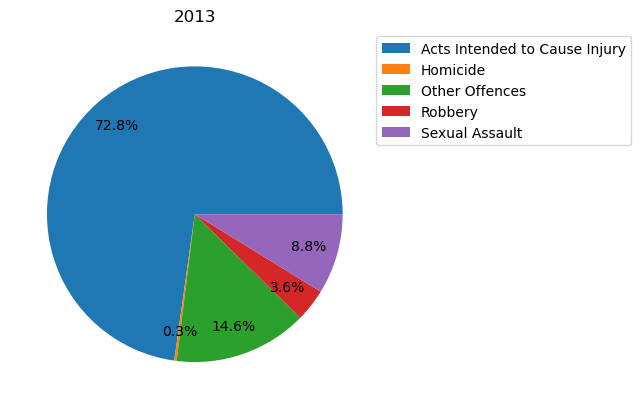

In [47]:
level2_2013_df.plot.pie(y = 'Offence count', autopct="%1.1f%%",pctdistance=0.8 ,labels=['']*len('Offence count'))
plt.legend(['Acts Intended to Cause Injury', 'Homicide', 'Other Offences', 'Robbery', 'Sexual Assault'], bbox_to_anchor = (1.7, 1),loc='upper right')
plt.ylabel("")
plt.title ('2013')

Text(0.5, 1.0, '2014')

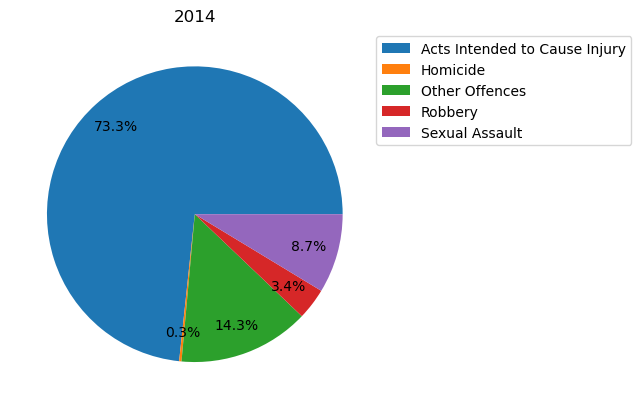

In [48]:
level2_2014_df.plot.pie(y = 'Offence count', autopct="%1.1f%%",pctdistance=0.8 ,labels=['']*len('Offence count'))
plt.legend(['Acts Intended to Cause Injury', 'Homicide', 'Other Offences', 'Robbery', 'Sexual Assault'], bbox_to_anchor = (1.7, 1),loc='upper right')
plt.ylabel("")
plt.title ('2014')

Text(0.5, 1.0, '2015')

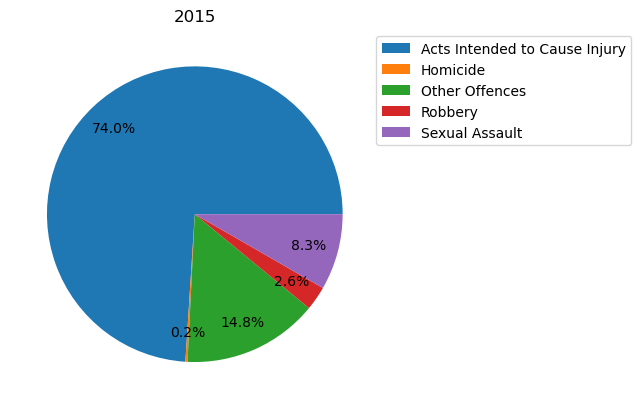

In [49]:
level2_2015_df.plot.pie(y = 'Offence count', autopct="%1.1f%%",pctdistance=0.8 ,labels=['']*len('Offence count'))
plt.legend(['Acts Intended to Cause Injury', 'Homicide', 'Other Offences', 'Robbery', 'Sexual Assault'], bbox_to_anchor = (1.7, 1),loc='upper right')
plt.ylabel("")
plt.title ('2015')

Text(0.5, 1.0, '2016')

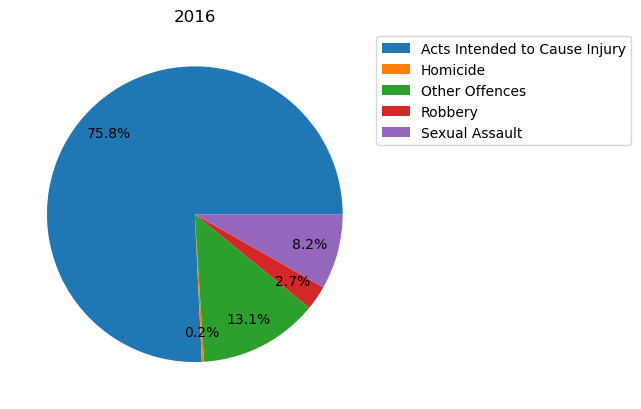

In [50]:
level2_2016_df.plot.pie(y = 'Offence count', autopct="%1.1f%%", pctdistance=0.8, labels=['']*len('Offence count'))
plt.legend(['Acts Intended to Cause Injury', 'Homicide', 'Other Offences', 'Robbery', 'Sexual Assault'], bbox_to_anchor = (1.7, 1),loc='upper right')
plt.ylabel("")
plt.title ('2016')

Text(0.5, 1.0, '2017')

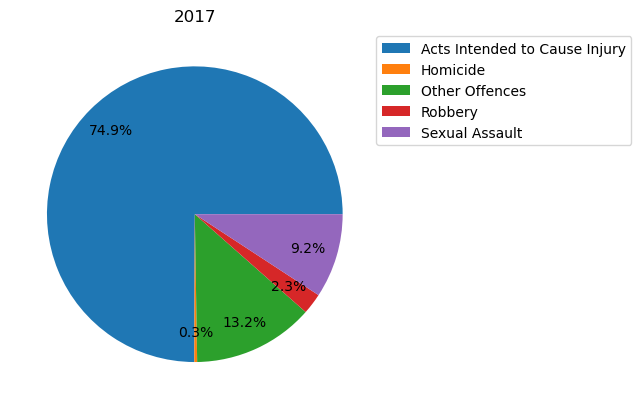

In [51]:
level2_2017_df.plot.pie(y = 'Offence count', autopct="%1.1f%%",pctdistance=0.8 ,labels=['']*len('Offence count'))
plt.legend(['Acts Intended to Cause Injury', 'Homicide', 'Other Offences', 'Robbery', 'Sexual Assault'], bbox_to_anchor = (1.7, 1),loc='upper right')
plt.ylabel("")
plt.title ('2017')

Text(0.5, 1.0, '2018')

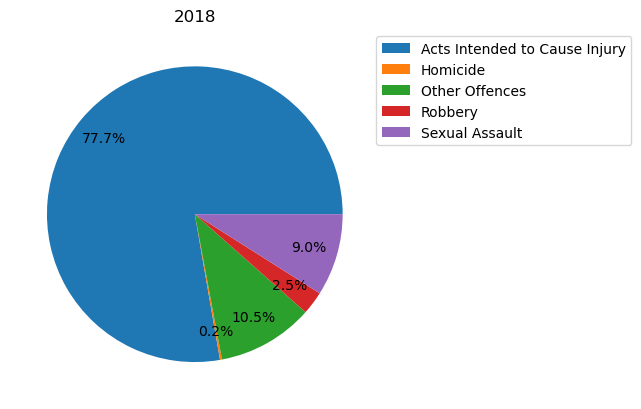

In [52]:
level2_2018_df.plot.pie(y = 'Offence count', autopct="%1.1f%%",pctdistance=0.8 ,labels=['']*len('Offence count'))
plt.legend(['Acts Intended to Cause Injury', 'Homicide', 'Other Offences', 'Robbery', 'Sexual Assault'], bbox_to_anchor = (1.7, 1),loc='upper right')
plt.ylabel("")
plt.title ('2018')

Text(0.5, 1.0, '2019')

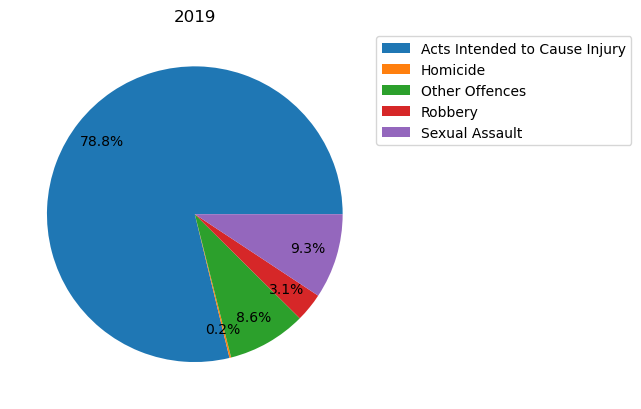

In [53]:
level2_2019_df.plot.pie(y = 'Offence count', autopct="%1.1f%%", pctdistance=0.8, labels=['']*len('Offence count'))
plt.legend(['Acts Intended to Cause Injury', 'Homicide', 'Other Offences', 'Robbery', 'Sexual Assault'], bbox_to_anchor = (1.7, 1),loc='upper right')
plt.ylabel("")
plt.title ('2019')

Text(0.5, 1.0, '2020')

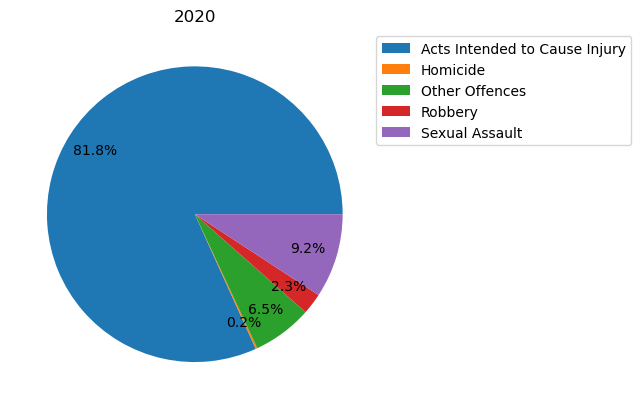

In [54]:
level2_2020_df.plot.pie(y = 'Offence count', autopct="%1.1f%%", pctdistance=0.8, labels=['']*len('Offence count'))
plt.legend(['Acts Intended to Cause Injury', 'Homicide', 'Other Offences', 'Robbery', 'Sexual Assault'], bbox_to_anchor = (1.7, 1),loc='upper right')
plt.ylabel("")
plt.title ('2020')

Text(0.5, 1.0, '2021')

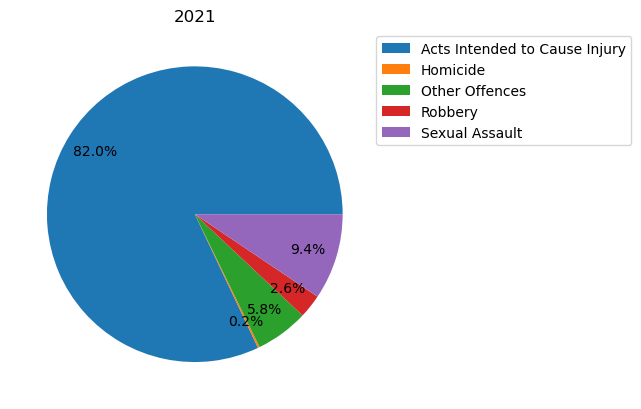

In [55]:
level2_2021_df.plot.pie(y = 'Offence count', autopct="%1.1f%%",pctdistance=0.8 ,labels=['']*len('Offence count'))
plt.legend(['Acts Intended to Cause Injury', 'Homicide', 'Other Offences', 'Robbery', 'Sexual Assault'], bbox_to_anchor = (1.7, 1),loc='upper right')
plt.ylabel("")
plt.title ('2021')

Text(0.5, 1.0, '2022')

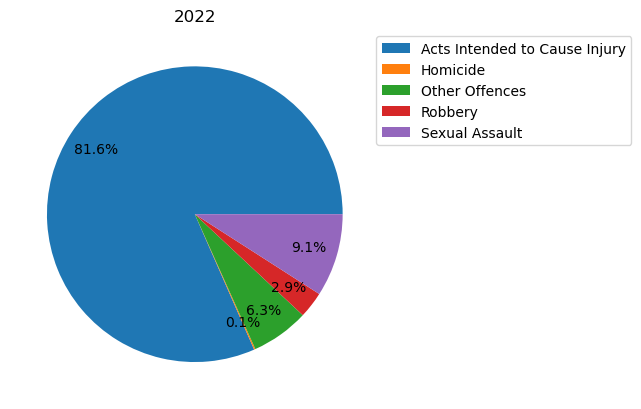

In [56]:
level2_2022_df.plot.pie(y = 'Offence count', autopct="%1.1f%%",  pctdistance=0.8, labels=['']*len('Offence count'))
plt.legend(['Acts Intended to Cause Injury', 'Homicide', 'Other Offences', 'Robbery', 'Sexual Assault'], bbox_to_anchor = (1.7, 1),loc='upper right')
plt.ylabel("")
plt.title ('2022')